In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse
from matplotlib import cm

In [2]:
def open_result(Path):
    
    name = 'D:\Kuliah\Skripsi\Conduction\output\Transient with Analytical' + Path
    
    x = []
    y = []
    analytic = []
    conserved = []
    
    file = open(name, "r")
    i = 0
    for data in file:
        if i > 0:
            splittedData = data.rstrip().split(",")

            x.append(float(splittedData[0]))
            y.append(float(splittedData[1]))
            analytic.append(float(splittedData[2]))
            conserved.append(float(splittedData[3]))
            
        i += 1
    
    file.close()
    
    return x, y, analytic, conserved

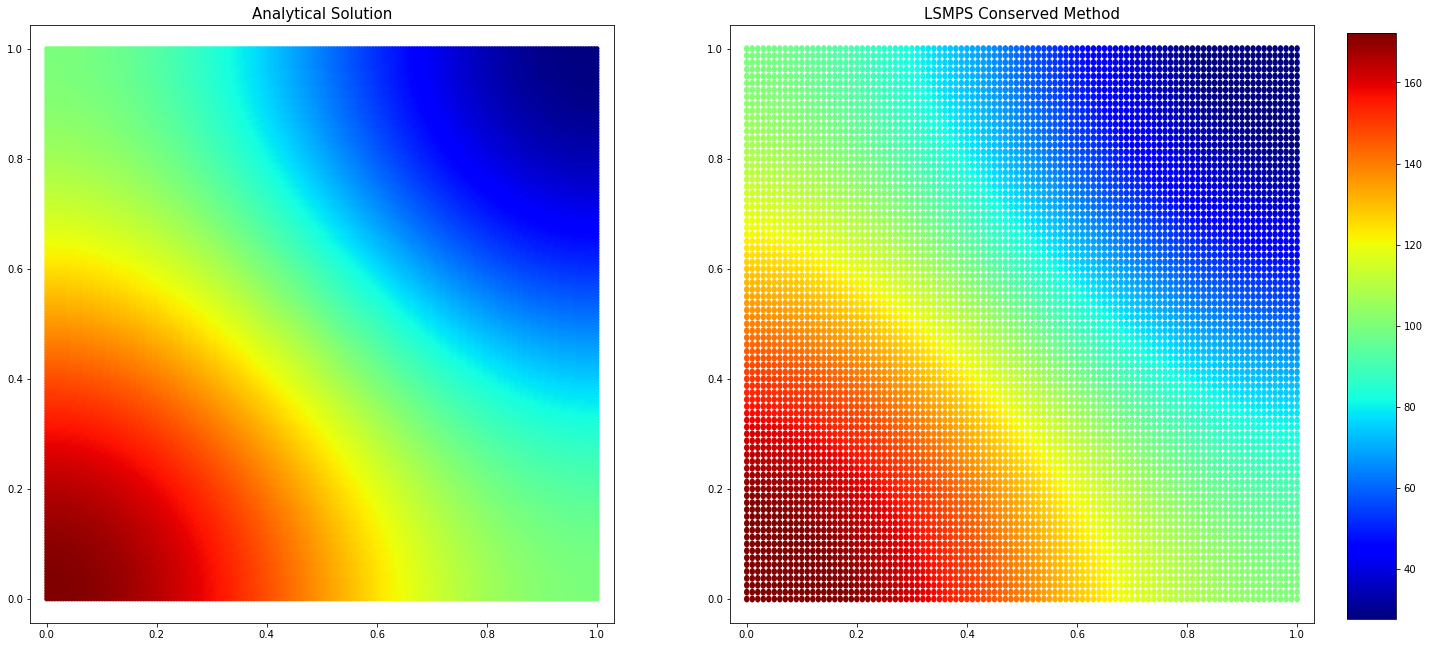

In [4]:
b_x, b_y, b_analytic, b_conserved = open_result('\\result 100x80 - 400s\out_40000.csv')

x = []
y = []
analytic = []

for i in np.linspace(0,1,200):
    for j in np.linspace(0,1,200):
        x.append(i)
        y.append(j)
        
        T = 100+50*(np.cos(np.pi*i)+np.cos(np.pi*j))*np.exp(-200*np.pi**2*400/2700/900)
        analytic.append(T)

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(23,11))

a = axes[0].scatter(x, y, c = analytic, s = 15, cmap='jet', vmin = min(analytic), vmax = max(analytic))
axes[0].set_title('Analytical Solution', size = 15)
axes[0].set_xlim(-0.03,1.03)
axes[0].set_ylim(-0.03,1.03)
axes[0].set_aspect('equal', 'datalim')

k = 1
for i in range(len(b_x)):    
    axes[1].add_patch(Ellipse([b_x[i],b_y[i]], width=k/100, height=k/80, angle=0, fc=cm.jet(float(b_conserved[i]-min(analytic))/(max(analytic)-min(analytic))), lw=0.))

axes[1].set_title('LSMPS Conserved Method', size = 15)
axes[1].set_xlim(-0.03,1.03)
axes[1].set_ylim(-0.03,1.03)
axes[1].set_aspect('equal', 'datalim')

fig.subplots_adjust(right = 0.9)
cbar_ax = fig.add_axes([0.92, 0.13, 0.03, 0.74])
fig.colorbar(a, cax=cbar_ax)

plt.show()


# fig.savefig('Figure/dfdx',bbox_inches='tight')

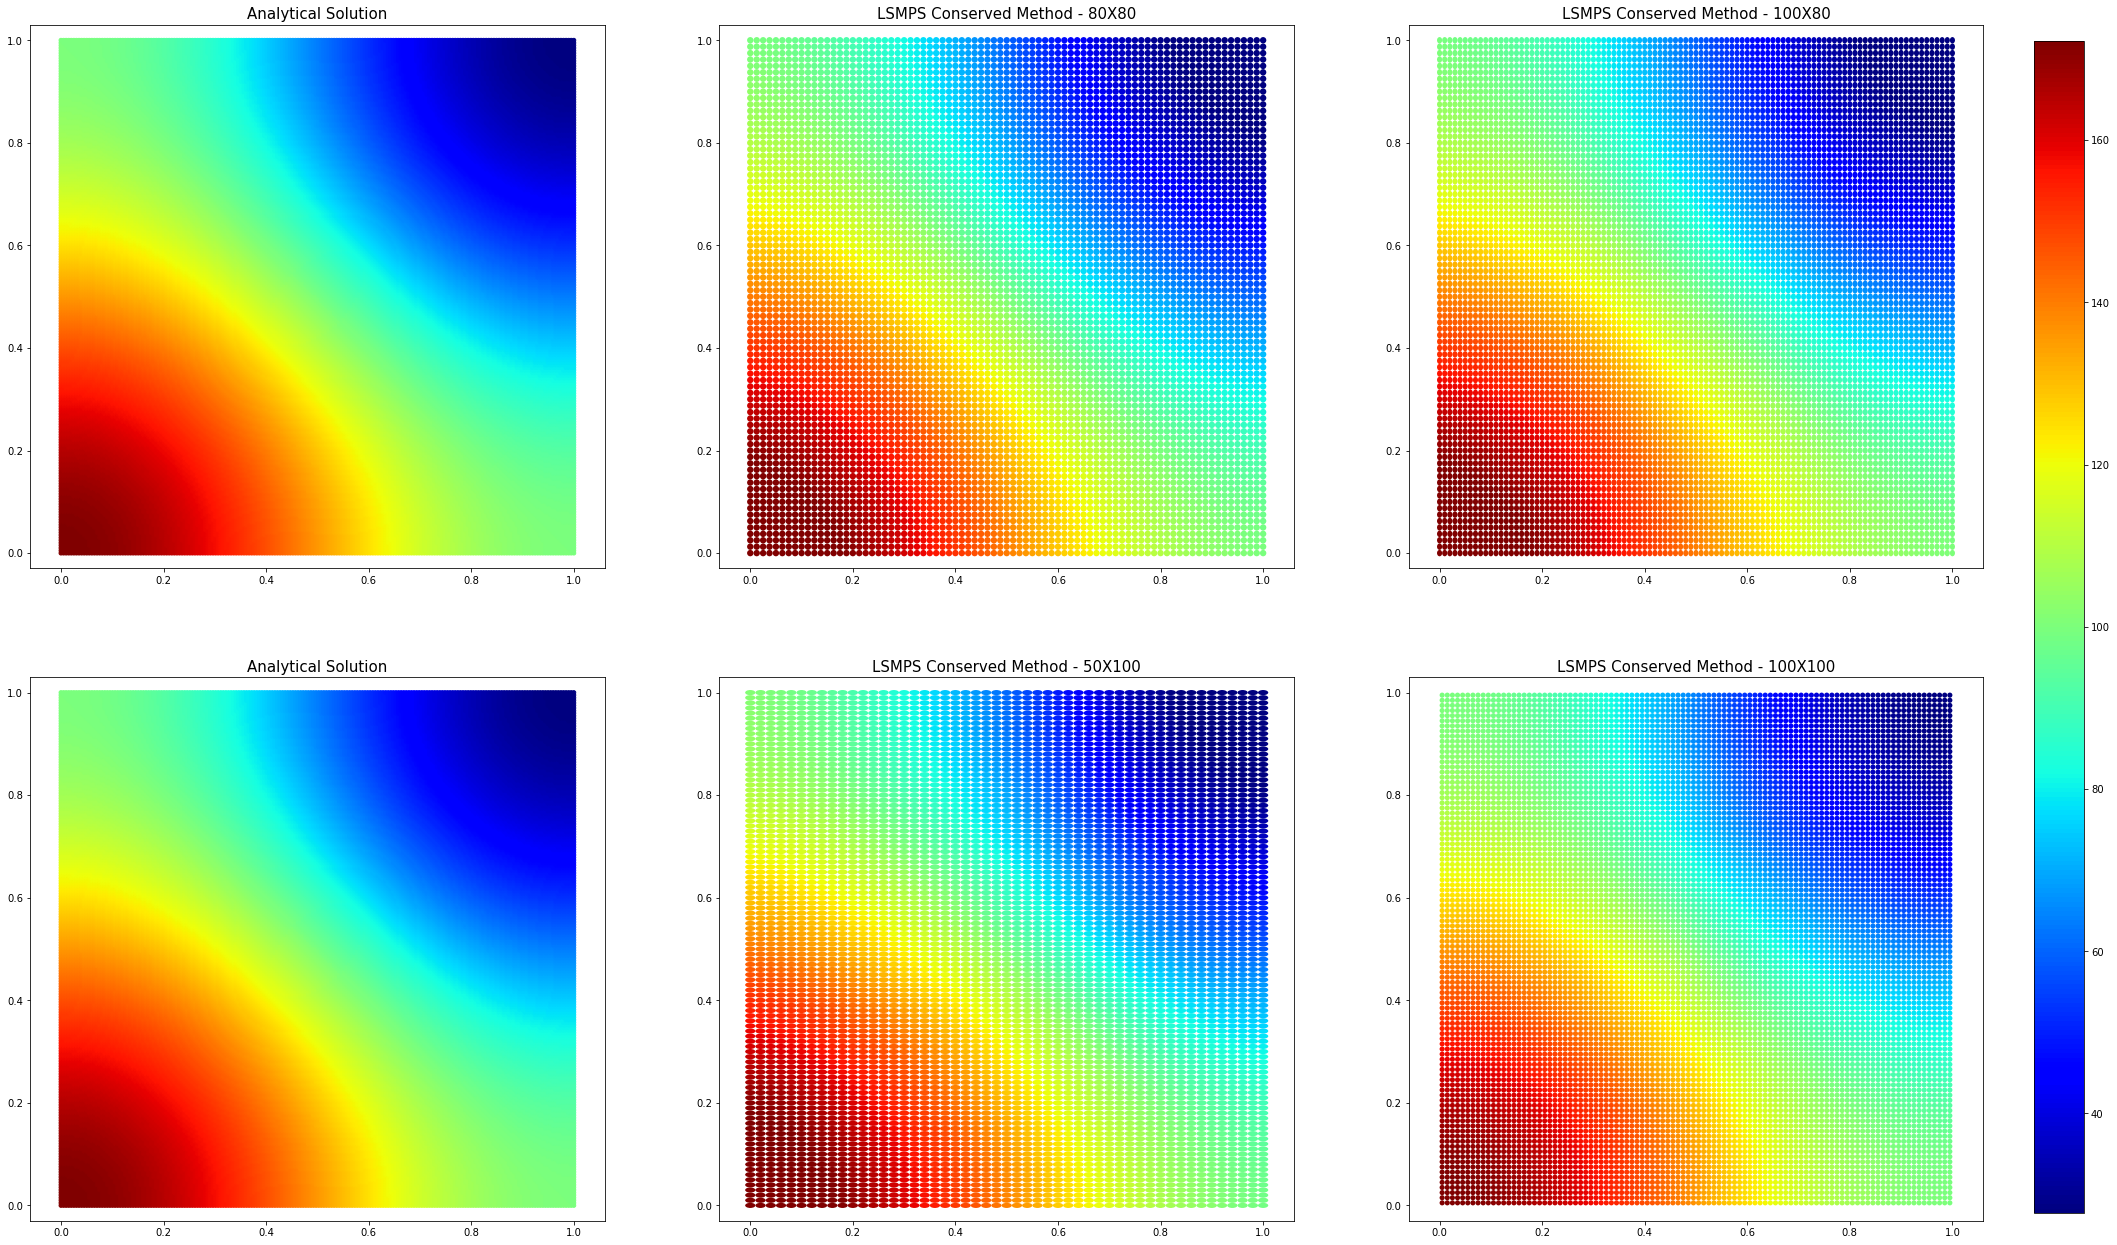

In [3]:
a_x, a_y, a_analytic, a_conserved = open_result('\\result 80x80 - 400s\out_40000.csv')
b_x, b_y, b_analytic, b_conserved = open_result('\\result 100x80 - 400s\out_40000.csv')
c_x, c_y, c_analytic, c_conserved = open_result('\\result 50x100 - 400s\out_40000.csv')
d_x, d_y, d_analytic, d_conserved = open_result('\\result 100x100 - 400s\out_40000.csv')


x = []
y = []
analytic = []

for i in np.linspace(0,1,200):
    for j in np.linspace(0,1,200):
        x.append(i)
        y.append(j)
        
        T = 100+50*(np.cos(np.pi*i)+np.cos(np.pi*j))*np.exp(-200*np.pi**2*400/2700/900)
        analytic.append(T)

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(35,22))

a = axes[0,0].scatter(x, y, c = analytic, s = 15, cmap='jet', vmin = min(analytic), vmax = max(analytic))
axes[0,0].set_title('Analytical Solution', size = 15)
axes[0,0].set_xlim(-0.03,1.03)
axes[0,0].set_ylim(-0.03,1.03)
axes[0,0].set_aspect('equal', 'datalim')

a = axes[1,0].scatter(x, y, c = analytic, s = 15, cmap='jet', vmin = min(analytic), vmax = max(analytic))
axes[1,0].set_title('Analytical Solution', size = 15)
axes[1,0].set_xlim(-0.03,1.03)
axes[1,0].set_ylim(-0.03,1.03)
axes[1,0].set_aspect('equal', 'datalim')

k = 1
for i in range(len(a_x)):    
    axes[0,1].add_patch(Ellipse([a_x[i],a_y[i]], width=k/80, height=k/80, angle=0, fc=cm.jet(float(a_conserved[i]-min(analytic))/(max(analytic)-min(analytic))), lw=0.))

axes[0,1].set_title('LSMPS Conserved Method - 80X80', size = 15)
axes[0,1].set_xlim(-0.03,1.03)
axes[0,1].set_ylim(-0.03,1.03)
axes[0,1].set_aspect('equal', 'datalim')

for i in range(len(b_x)):    
    axes[0,2].add_patch(Ellipse([b_x[i],b_y[i]], width=k/100, height=k/80, angle=0, fc=cm.jet(float(b_conserved[i]-min(analytic))/(max(analytic)-min(analytic))), lw=0.))

axes[0,2].set_title('LSMPS Conserved Method - 100X80', size = 15)
axes[0,2].set_xlim(-0.03,1.03)
axes[0,2].set_ylim(-0.03,1.03)
axes[0,2].set_aspect('equal', 'datalim')

k = 1
for i in range(len(c_x)):    
    axes[1,1].add_patch(Ellipse([c_x[i],c_y[i]], width=k/50, height=k/100, angle=0, fc=cm.jet(float(c_conserved[i]-min(analytic))/(max(analytic)-min(analytic))), lw=0.))

axes[1,1].set_title('LSMPS Conserved Method - 50X100', size = 15)
axes[1,1].set_xlim(-0.03,1.03)
axes[1,1].set_ylim(-0.03,1.03)
axes[1,1].set_aspect('equal', 'datalim')

for i in range(len(d_x)):    
    axes[1,2].add_patch(Ellipse([d_x[i],d_y[i]], width=k/100, height=k/100, angle=0, fc=cm.jet(float(d_conserved[i]-min(analytic))/(max(analytic)-min(analytic))), lw=0.))

axes[1,2].set_title('LSMPS Conserved Method - 100X100', size = 15)
axes[1,2].set_xlim(-0.03,1.03)
axes[1,2].set_ylim(-0.03,1.03)
axes[1,2].set_aspect('equal', 'datalim')

fig.subplots_adjust(right = 0.9)
cbar_ax = fig.add_axes([0.92, 0.13, 0.02, 0.74])
fig.colorbar(a, cax=cbar_ax)

plt.show()



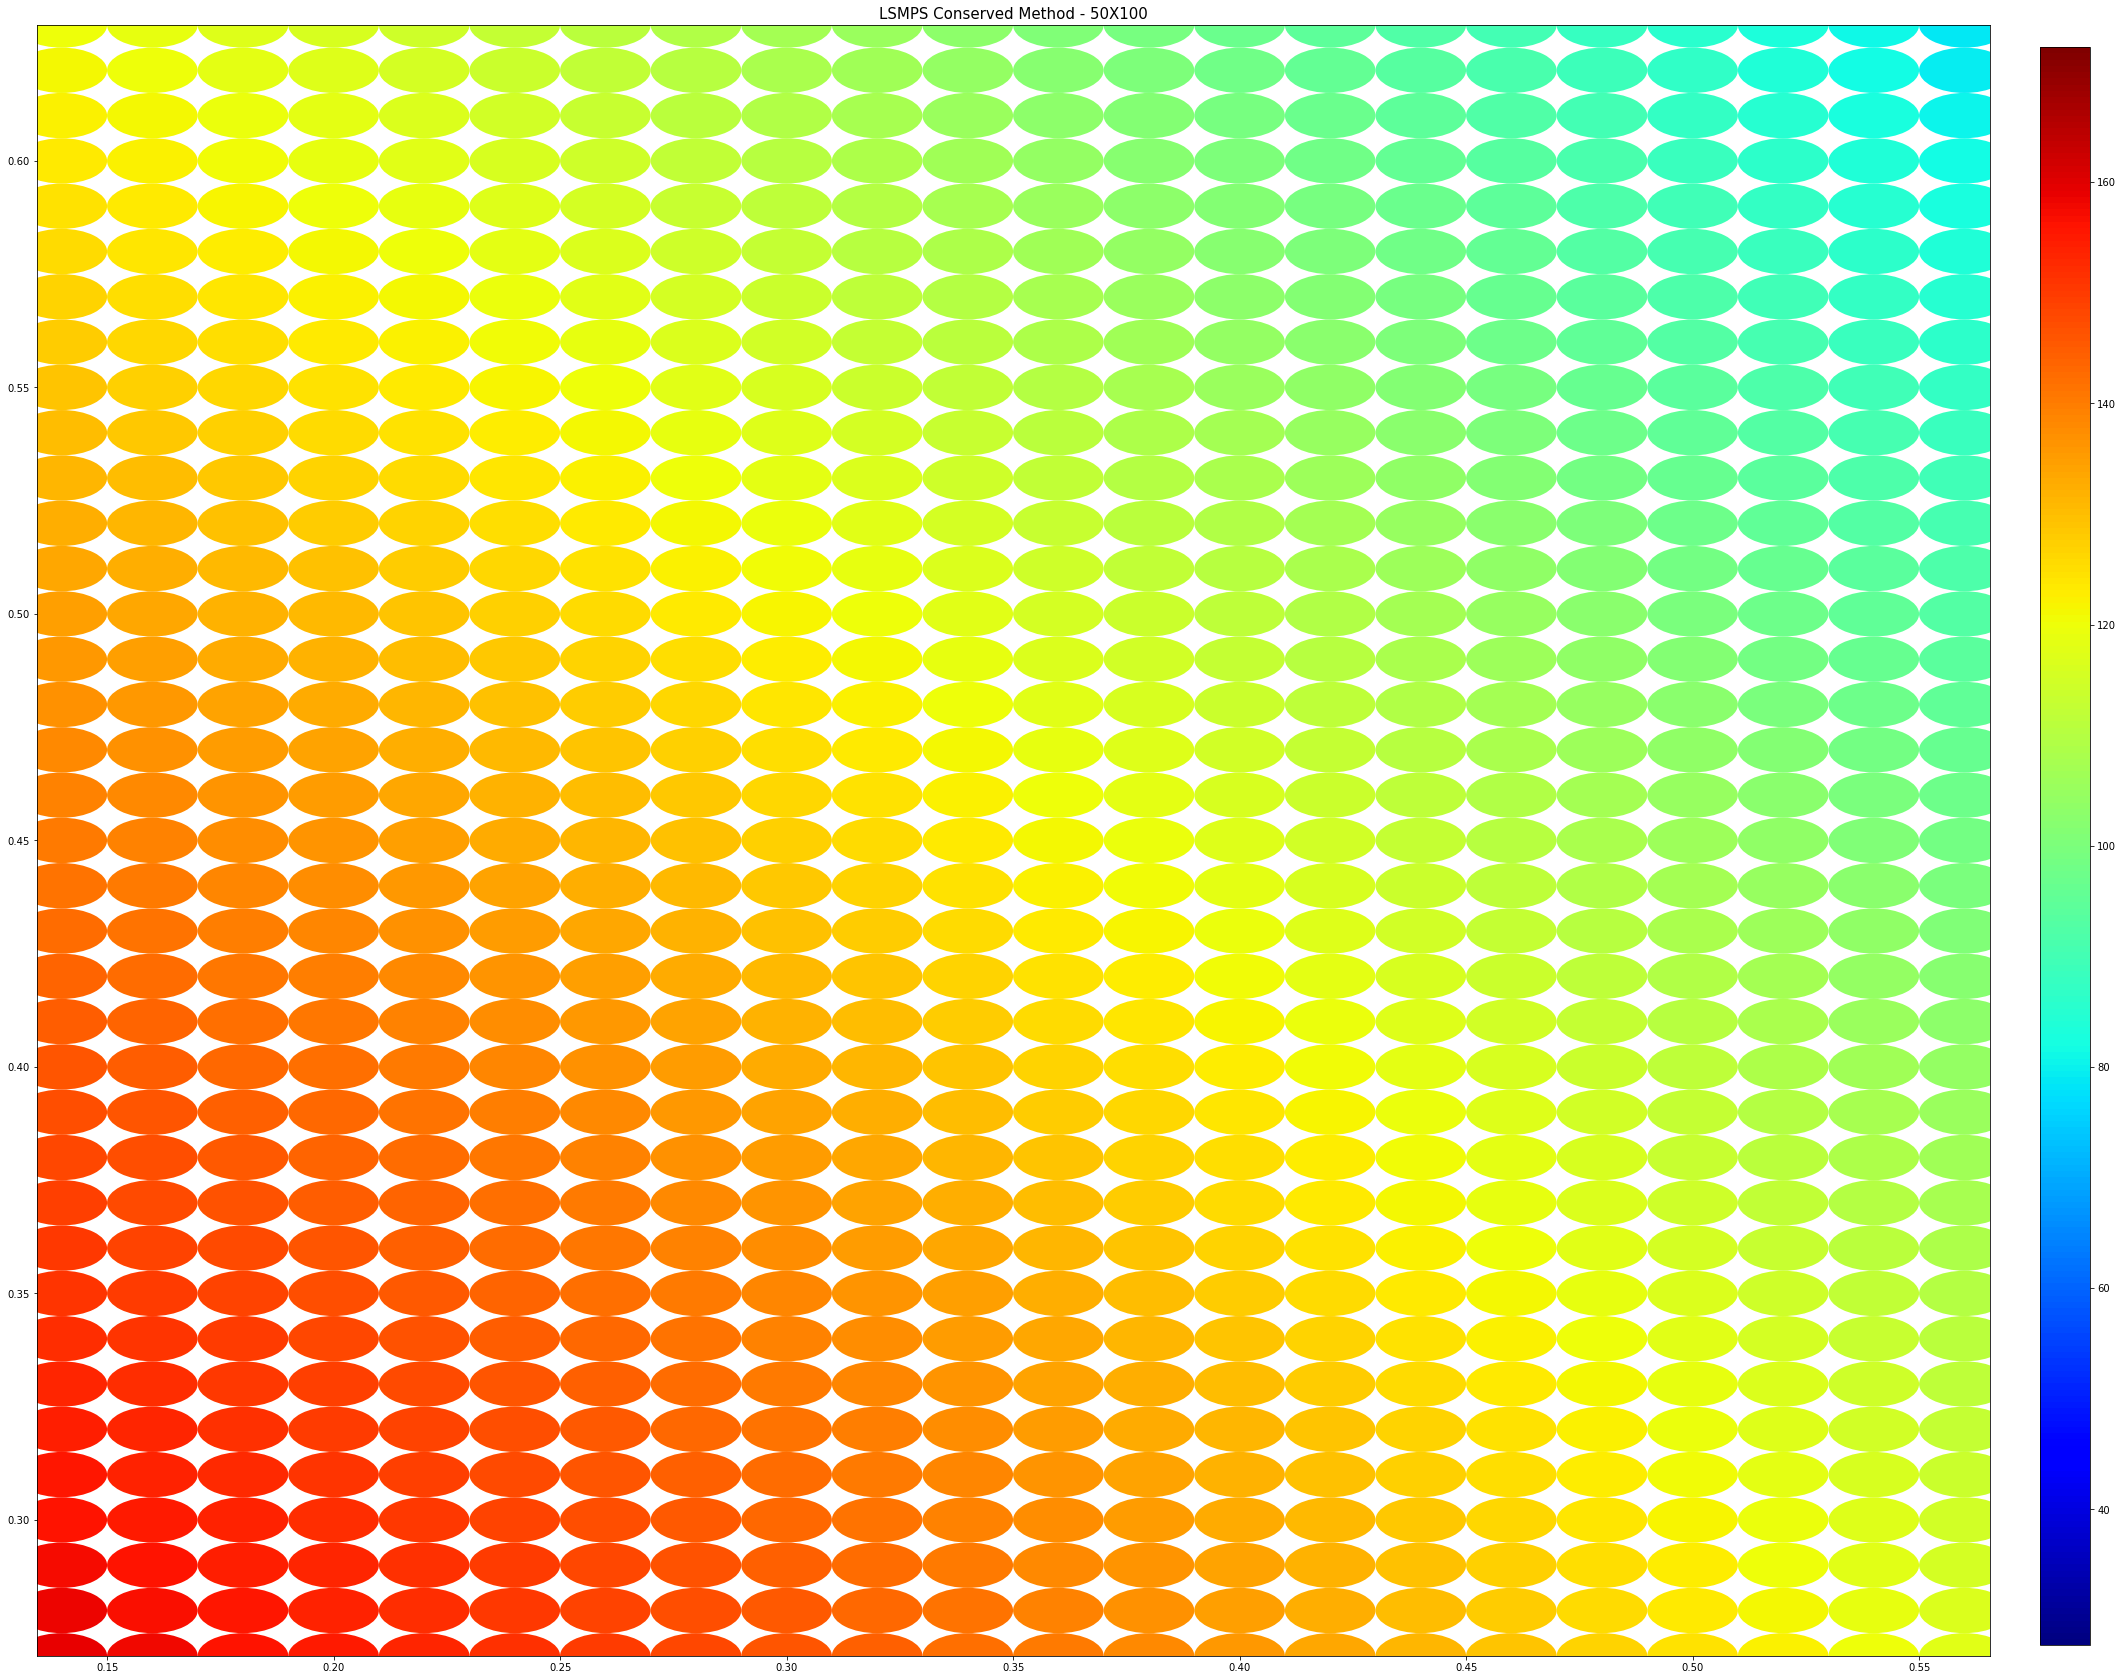

In [5]:
fig, axes = plt.subplots(figsize=(35,30))

k = 1
for i in range(len(c_x)):    
    axes.add_patch(Ellipse([c_x[i],c_y[i]], width=k/50, height=k/100, angle=0, fc=cm.jet(float(c_conserved[i]-min(analytic))/(max(analytic)-min(analytic))), lw=0.))

axes.set_title('LSMPS Conserved Method - 50X100', size = 15)
axes.set_xlim(0.17,0.53)
axes.set_ylim(0.27,0.63)
axes.set_aspect('equal', 'datalim')

fig.subplots_adjust(right = 0.9)
cbar_ax = fig.add_axes([0.92, 0.13, 0.02, 0.74])
fig.colorbar(a, cax=cbar_ax)

plt.show()
